
## MINI Project: LOGISTIC REGRESSION and SVM -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

# Table of contents
1. [Introduction](#introduction)
2. [Data Meaning Type](#dataMeaningType)
    - 2.1 [Data dictionary](#dataDict)
    - 2.2 [Data quality](#dataQuality)
        - 2.2.1 [Missing data statistics](#missingDataStatistics)
        - 2.2.2 [Replace missing data](#replaceMissingData)
    - 2.3 [New Features](#newFeatures) 
3. [Pre-processing](#preprocessing)
    - 3.1 [Class distribution](#classDistribution)
    - 3.2 [Remove high correlation](#removeCorrelation)
    - 3.3 [Remove non-unique features](#noUniqueValues)
    - 3.4 [Create dummy variables](#dummyVariables)
4. [Section 1](#question1)
    - 4.1 [Comparing Logistic Regression vs SVM](#logVSsvm)
    - 4.2 [Tune Models](#tune)
        - 4.2.1 [Approach1: Feature selection](#approach1)
        - 4.2.2 [Approach2: Hyperparameterization](#approach2)
        - 4.2.3 [Approach3: Stochastic Gradient Descent](#approach3)
        - 4.2.4 [Approach4: Standardizing Stochastic Gradient Descent](#approach4)
        - 4.2.5 [Summary](#approachSummary)
5. [Section 2](#question2)
6. [Section 3](#question3)
7. [Section 4](#question4)

        
    

### Introduction <a class="anchor" id="introduction"></a>
* For this project we'll be using the North Carolina Schools education data set. The data is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public-school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

* Our starting datasets [All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews GitHub where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans for Machine learning. You can learn more on the data set from Dr. Drew's GitHub https://github.com/jakemdrew/EducationDataNC.

* We performed Visualization on a subset of the data targeted for schools with `high schools`, which can be accessed from https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.



In [58]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


# Command for plots to appear in the iPython Notebook
%matplotlib inline
wd = os.getcwd() #get working directory

#Read in raw data

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/All_Data_By_School_Final.csv"
s=requests.get(url).content

schoolData=pd.read_csv(io.StringIO(s.decode('utf-8')))

#url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/1516_Test_Scores.csv"
url="https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/1516_Test_Scores.csv"
t=requests.get(url).content

testScores=pd.read_csv(io.StringIO(t.decode('utf-8')))

#Review raw data before the join
schoolData.info()

#join files using school / unit code
# schoolData = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
schoolData = schoolData.merge(testScores, on='unit_code', how='left', suffixes=('_schoolData', '_testScores'))
schoolData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 365 entries, Year to Passing_Math_III
dtypes: float64(324), int64(17), object(24)
memory usage: 7.2+ MB


### Data Meaning Type <a class="anchor" id="dataMeaningType"></a>

In [59]:
url = 'https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/DataMeaningType.csv'

s=requests.get(url).content
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_csv(io.StringIO(s.decode('utf-8')))


,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary <a class="anchor" id="dataDict"></a>
> Since this dataset has numerous columns we needed a fast way to quickly find column name descriptions for easy reference. For exceptional work, we created a function to quickly pull the data from a csv data file. This involved converting the pdf document to an excel spreadsheet and formatting the data so that we could easily import into pandas. The code below is a working code for our data dictionary.

In [26]:

DataDict=pd.read_csv(io.StringIO(s.decode('utf-8')))

DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: 
You entered:  


,Attribute,Meaning,Type


### Data Quality <a class="anchor" id="dataQuality"></a>

##### *Missing Data Statistics* <a class="anchor" id="missingDataStatistics"></a>

> In this section we explore missing data in the highschool data set that was created from the original North Carolina data set. After exploring the missing data we will discuss the approach for handling them below.

In [60]:
schoolData['title1_type_flg'] = schoolData['title1_type_flg'].map({-1:True, 0:False})
schoolData['clp_ind_flg'] = schoolData['clp_ind_flg'].map({-1:True, 0:False})
schoolData['focus_clp_flg'] = schoolData['focus_clp_flg'].map({-1:True, 0:False})
schoolData['summer_program_flg'] = schoolData['summer_program_flg'].map({-1:True, 0:False})
schoolData['asm_no_spg_flg'] = schoolData['asm_no_spg_flg'].map({-1:True, 0:False})
schoolData['no_data_spg_flg'] = schoolData['no_data_spg_flg'].map({-1:True, 0:False})
schoolData['stem_flg'] = schoolData['stem_flg'].map({-1:True, 0:False})
schoolData = schoolData.drop(['street_ad', 'School Name', 'District Name'],axis=1)

>We are dropping `street_ad`, `School Name` and `District name` because it does not contribute to the prediction accuracy.

In [61]:
#Check for missing values
Temp = pd.DataFrame(schoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with at least 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic stats on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No. of rows in schoolData: ',len(schoolData))
print('No. of Columns in schoolData: ',len(schoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No. of Complete data columns: ', len(schoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))
print('No. of Columns with more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(schoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))/len(schoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))/len(schoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(schoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(50)))

##################################################
###              Stats on missing data         ###
##################################################
No. of rows in schoolData:  2579
No. of Columns in schoolData:  362
No. of Columns with Missing data:  286
No. of Complete data columns:  76
No. of Columns with 100% missing Values:  20
No. of Columns with more than 95% missing Values:  27
% of Columns with some Missing data:  79.006 %
% of Columns with 100% Missing data:  5.525 %
% of Columns with more than 95% Missing data:  7.459 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                  ColumnName   Missing %
0          2579            GCE_PRM_Dist_Pct  100.000000
1          2579        prin_advance_dgr_pct  100.000000
2          2579           GCE_PRM_State_Pct  100.000000
3          2579           GCE_LEP_State_Pct  100.000000
4          2579         

> From above we note, of the 362 columns in SchoolData, 286 (79.0%) of them have some missing data. 20(5.52%) of columns have all the data missing whereas 27 (7.45%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if these were new fields introduced recently and the schools have not collected it. On the other hand, for the partially completed datasets, some schools might have left these columns blank, if it wasn't applicable.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try to complete the missing data with either mean, median, mode, or various regression and prediction techniques to reduce bias.

In [62]:
#All columns from Original schoolData
AllColumns =schoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(27) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = schoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(schoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 362 entries, Year to Passing_Math_III
dtypes: bool(7), float64(324), int64(10), object(21)
memory usage: 7.0+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 334 entries, lea_crime_per_c_num to EOG_Reading_Gr5_GLP
dtypes: bool(7), float64(297), int64(10), object(20)
memory usage: 6.5+ MB
None


,lea_crime_per_c_num,PASSED_EOG_Dist_Pct,supplies_expense_pct,EOG_Gr7_GLP,st_instruct_equip_exp_pct,st_1yr_tchr_trnovr_pct,lea_advance_dgr_pct,sch_percent_college_enrolled_16_mos_post_grad,st_cte_courses,wap_num,...,lea_tchyrs_0thru3_pct,st_class_teach_num,Avg_Dist_Size_05,Avg_Class_Size_00,st_advance_dgr_pct,lea_1yr_tchr_trnovr_pct,long_susp_per_c_num,EOG_Math_Gr4_CACR,GCE_ALL_School_Pct,EOG_Reading_Gr5_GLP
0,NaN,NaN,0.087,87.1,0.01,0.157,NaN,73.11828,NaN,NaN,...,NaN,36,NaN,20.0,0.277,NaN,0.0,80.2,0.000,75.2
1,NaN,NaN,0.043,94.2,0.01,0.127,NaN,NaN,NaN,NaN,...,NaN,32,NaN,24.0,0.262,NaN,0.0,70.6,0.042,89.2
2,0.96,NaN,NaN,NaN,0.01,0.148,0.211,45.00000,NaN,NaN,...,0.242,54,NaN,NaN,0.248,0.130,0.0,NaN,NaN,NaN
3,0.22,0.529,NaN,NaN,0.01,0.134,0.246,NaN,NaN,17.0,...,0.276,34,22.0,18.0,0.285,0.117,0.0,62.9,0.131,51.1
4,0.22,0.529,NaN,NaN,0.01,0.134,0.246,NaN,NaN,24.0,...,0.276,34,22.0,18.0,0.285,0.117,0.0,56.8,0.214,60.9


> In the code block above, we dropped 27 columns which had >95% of the data missing. We also deleted the unit_code column which is key to identifying the school/Lea/state attributes. 

In [63]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(schoolDataNew.columns))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 307 entries, lea_crime_per_c_num to EOG_Reading_Gr5_GLP
dtypes: float64(297), int64(10)
memory usage: 6.1 MB
 
##########################################
#     Columns with Categorical data      #
##########################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Data columns (total 27 columns):
grades_BYOD             2313 non-null object
scity_ad                2579 non-null object
focus_clp_flg           2579 non-null bool
school_type_txt         2579 non-null object
Reading SPG Grade       1870 non-null object
esea_status             201 non-null object
category_cd             2579 non-null object
clp_ind_flg             2579 non-null bool
type_cd_txt             2579 non-null object
State Gap Compare

> In the code block above we explored the columns with missing data that we retained. We grouped the columns into two groups based on data type, there were two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 129 columns retained with missing data, 120 are of dtype float64. After reviewing individual columns description from the data dictionary, we chose to replace these missing float types with median. We didn't go with mean simply because with existence of outliers, mean would be screwed compared to median.
2. #### Columns with categorical data types (objects and bool)
For the 9 categorical columns, we will be replacing the missing values with mode.

### Replace missing data <a class="anchor" id="replaceMissingData"></a>

In [64]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #categorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
lea_crime_per_c_num                                162
PASSED_EOG_Dist_Pct                               1248
supplies_expense_pct                              2419
EOG_Gr7_GLP                                       1865
st_instruct_equip_exp_pct                            0
st_1yr_tchr_trnovr_pct                               0
lea_advance_dgr_pct                                160
sch_percent_college_enrolled_16_mos_post_grad     2034
st_cte_courses                                    1971
wap_num                                            103
sat_avg_score_num                                 2040
EOG_Math_Gr7_CACR                                 1891
st_ap_participation_pct                              0
st_local_perpupil_num                                0
Year           

> In the code block above, we replaced missing categorical values with the mode and missing continuous values with the median. A total of 129 columns with missing values have been cleaned and "recovered".

In [65]:
new_schooldata.shape

(2579, 334)

category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
dtype: int64

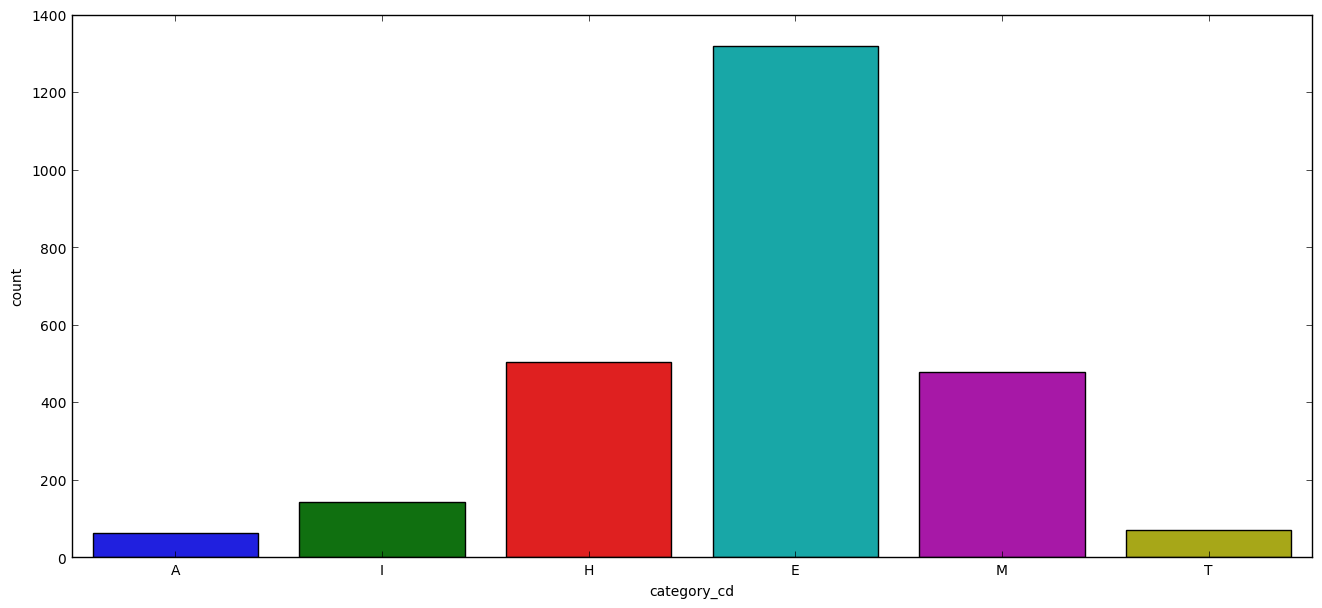

In [66]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

>  The bar graph above is shows the distribution of different school categories in state of North Carolina. See summary table below for school category descriptions and % distribution

Category | Description|Count |Percentage
--- | --- | ---|---
A | School has elementary, middle, and high school grades  | 63|2.44%
E | School has elementary schools grades (PK-5) | 1320|51.18%
H | School has high schools grades (9-13)  | 505|19.58%
I | Schools with elementary, middle and high school grades | 142|5.51%
M | School has middle schools grades (6-8)  | 478|18.53%
T | School has middle and high school grades | 71|2.75%

### New Features <a class="anchor" id="newFeatures"></a>

In [67]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))


School_Final = new_schooldata.drop(groupedbins, 1)
School_Final.T


,0,1,2,3,4,5,6,7,8,9,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578
lea_crime_per_c_num,0.3,0.3,0.96,0.22,0.22,1.09,0.96,0.22,0.22,0.96,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
PASSED_EOG_Dist_Pct,0.578,0.578,0.578,0.529,0.529,0.578,0.578,0.529,0.529,0.578,...,0.578,0.578,0.578,0.578,0.578,0.578,0.578,0.578,0.578,0.578
supplies_expense_pct,0.087,0.043,0.0615,0.0615,0.0615,0.0615,0.0615,0.0615,0.0615,0.0615,...,0.037,0.084,0.125,0.176,0.046,0.06,0.039,0.109,0.114,0.056
EOG_Gr7_GLP,87.1,94.2,51.15,51.15,51.15,22.9,51.15,51.15,51.15,51.15,...,87.1,33.3,51.15,51.15,81,51.15,51.15,55.9,56.6,65.1
st_instruct_equip_exp_pct,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
st_1yr_tchr_trnovr_pct,0.157,0.127,0.148,0.134,0.134,0.151,0.148,0.134,0.134,0.148,...,0.127,0.157,0.134,0.148,0.127,0.134,0.134,0.127,0.127,0.127
lea_advance_dgr_pct,0.274,0.274,0.211,0.246,0.246,0.239,0.211,0.246,0.246,0.211,...,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274
sch_percent_college_enrolled_16_mos_post_grad,73.1183,55.4217,45,55.4217,55.4217,55.4217,55.4217,55.4217,55.4217,57.9592,...,55.4217,40,55.4217,55.4217,55.4217,55.4217,55.4217,55.4217,55.4217,55.4217
st_cte_courses,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,...,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203,0.639203
wap_num,40,40,40,17,24,49,22,45,34,64,...,40,40,12,21,9,7,40,10,40,40


In [68]:
School_Final.shape

(2579, 336)

> From the above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to group the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school score. `The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use these features to see if they improved our model performance.


### Moving forward we will use this data with the new created features for modeling...

In [69]:
modelingdata=School_Final.copy()
modelingdata.head()

,lea_crime_per_c_num,PASSED_EOG_Dist_Pct,supplies_expense_pct,EOG_Gr7_GLP,st_instruct_equip_exp_pct,st_1yr_tchr_trnovr_pct,lea_advance_dgr_pct,sch_percent_college_enrolled_16_mos_post_grad,st_cte_courses,wap_num,...,Avg_Dist_Size_05,Avg_Class_Size_00,st_advance_dgr_pct,lea_1yr_tchr_trnovr_pct,long_susp_per_c_num,EOG_Math_Gr4_CACR,GCE_ALL_School_Pct,EOG_Reading_Gr5_GLP,Overall_Achievement_Score_bins,SchoolWeightedScore
0,0.30,0.578,0.0870,87.10,0.01,0.157,0.274,73.118280,0.639203,40.0,...,21.0,20.0,0.277,0.132,0.0,80.2,0.000,75.2,55-69,173.07
1,0.30,0.578,0.0430,94.20,0.01,0.127,0.274,55.421687,0.639203,40.0,...,21.0,24.0,0.262,0.132,0.0,70.6,0.042,89.2,55-69,173.07
2,0.96,0.578,0.0615,51.15,0.01,0.148,0.211,45.000000,0.639203,40.0,...,21.0,19.0,0.248,0.130,0.0,49.4,0.098,54.4,55-69,173.07
3,0.22,0.529,0.0615,51.15,0.01,0.134,0.246,55.421687,0.639203,17.0,...,22.0,18.0,0.285,0.117,0.0,62.9,0.131,51.1,55-69,173.07
4,0.22,0.529,0.0615,51.15,0.01,0.134,0.246,55.421687,0.639203,24.0,...,22.0,18.0,0.285,0.117,0.0,56.8,0.214,60.9,55-69,173.07


### Data pre-processing for Classification <a class="anchor" id="preprocessing"></a>

#### summer_program_flg  Classification

For this Classification exercise (Logistic regression and SVM) modeling we have chosen to build models to predict if a school has a summer program  or not which is depicted by the boolean attribute `summer_program_flg` based on all the other features of the North Carolina Education data. In the code block below we create two datasets, the observed data X and an external variable y.

In [70]:
%%time
#Create data = x
df_X = modelingdata.copy()
#create target = Y
df_y = df_X.summer_program_flg
print('X shape before ')
print(df_X.shape)
#drop the response column from the x dataset
df_X.pop('summer_program_flg')
print('X shape after ')
print(df_X.shape)
print('Y shape after ')
print(df_y.shape)



X shape before 
(2579, 336)
X shape after 
(2579, 335)
Y shape after 
(2579,)
CPU times: user 4.93 ms, sys: 2.25 ms, total: 7.18 ms
Wall time: 4.88 ms


> In above code, we split that data into X and y for modeling

### Class Distribution <a class="anchor" id="classDistribution"></a>

`summer_program_flg` with a value of `True` represents that a school has a summer program. The distribution of this class variable is shown below:

Summer_program_flg
Counter({False: 1702, True: 877})


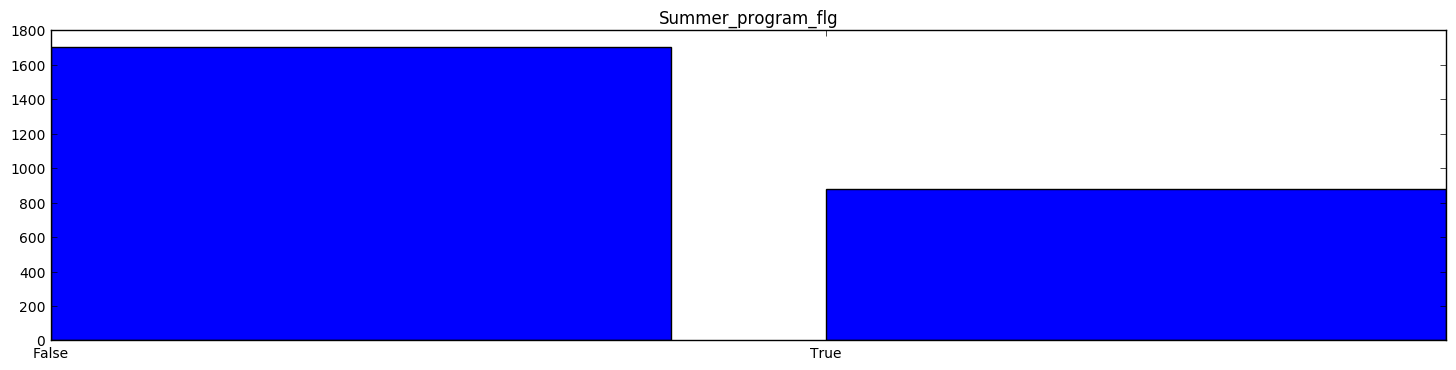

CPU times: user 243 ms, sys: 12.5 ms, total: 256 ms
Wall time: 257 ms


In [71]:
%%time
import collections
import matplotlib.pyplot as plt
a = df_y
data=collections.Counter(a)
print('Summer_program_flg')
print(data)

names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (18,4))
plt.title('Summer_program_flg')
plt.bar(range(len(data)),values,tick_label=names)

#plt.savefig('bar.png')
plt.show()

There is some imbalance of the class variable, with 66% of schools **not** having a summer school program and 34% of the schools having a summer school program. Whenever we have class imbalance, it might be useful to calculate the accuracy of the **Null Model** - that is, what if our estimator always predicted the majority class ? 

In [72]:
max(abs(df_y.mean()), 1 - abs(df_y.mean()))

0.65994571539356339

A model which always predicts False will have an accuracy of 66%. This number gives us a baseline to compare the model performance (using accuracy as the metric) in the subsequent sections.

#### Run Correlation to get the highly correlated columns to eliminate <a class="anchor" id="removeCorrelation"></a>
> To improve the performance of our logistics regression model, we begin by running a correlation matrix on our X dataset to identify Multicollinearity of predictors and eliminate the highly correlated predictors.

In [73]:
#finding a list of the most correlated features


temp  = df_X.select_dtypes(include=['int','float']) # select int to run corr on
catcols  = df_X.select_dtypes(include=['object', 'bool', 'category']) #category columns
#print(catcols)
print('X df before running correlation')
print(df_X.shape)
c = temp.corr().abs()
s =pd.DataFrame(c.unstack())
#print(s)
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)

#filter to correlation between range
#keepnew =  result[result.Column1 == result.Column2]
result1 =  result[((result.correlation <= 0.95))]

#result1
#combine the columns into a list
col= pd.DataFrame(result1.Column1)
col.columns = ['Columns']
col1 =pd.DataFrame(result1.Column2)
col1.columns = ['Columns']
df = col.append(col1)
#df = df.append(catcols)



#find only unique columns
UniqueColumns =pd.unique(df.Columns)

df_X_temp = df_X[UniqueColumns]

df_X =  pd.concat([df_X_temp, catcols], axis=1)

#shape on the new df_X
df_X.reset_index()
df_y.reset_index()
print('X df after running correlation')
print(df_X.shape)
#print(cols)
##plt.matshow(c)

X df before running correlation
(2579, 335)
X df after running correlation
(2579, 312)


In the code block above we found and ran correlation matrices on the X df to identify the most strongly correlated features >0.95 and remove them.  **23 features are eliminated for being highly correlated thus redundant.**

### Dropping columns that don't have unique values <a class="anchor" id="noUniqueValues"></a>

In [74]:
## Count unique per columns
#Inspect the high school data fields 
df_X_temp = df_X.copy()
df_X_temp = df_X_temp.describe(include='all').T
# include the data type of the column in the dataframe
df_X_temp['type']= df_X.dtypes
# Reset the index of the dataframe to have index as numbers to have the number of rows visible in the output
df_X_temp.reset_index(inplace=True)
df_X_temp.rename(columns={'index': 'column_name'}, inplace=True)
x= {}
#count unique values per column
for i in df_X.columns:
    #print(i,len(pd.unique(df_X[i])))
    index=i
    unique = len(pd.unique(df_X[i]))
    x.update({index: unique})
temp =pd.DataFrame(list(x.items()), columns=['column_name', 'Unique'])

#merge the two dataframe on column name
df_X_temp = df_X_temp.merge(temp, on='column_name')

# Select columns where unique value is 1
temp1 = df_X_temp[df_X_temp['Unique']==1]

#df_X = df_X.drop(temp1['column_name'], axis =1)

print('###columns to be dropped ####')
df_X.drop( temp1['column_name'], axis=1, inplace=True)
print(temp1['column_name'])



###columns to be dropped ####
241                GCE_SWD_State_Pct
242        nat_sat_participation_pct
243               PROMOTED_State_Pct
244            st_state_perpupil_num
245            st_prinyrs_11plus_pct
246     State_Prin_Exp_Pct_10+_Years
247     st_total_specialized_courses
248                 st_prin_male_pct
249                GCE_ALL_State_Pct
250                st_prin_other_pct
251             PASSED_EOG_State_Pct
252             st_wap_per_classroom
253             PASSED_LAA_State_Pct
254             st_books_per_student
255          st_supplies_expense_pct
256        st_stud_internet_comp_num
257          st_ap_participation_pct
258          st_services_expense_pct
259    State_Prin_Exp_Pct_4_10_Years
260           st_prinyrs_4thru10_pct
261             st_total_expense_num
262            st_prinyrs_0thru3_pct
263     State_Prin_Exp_Pct_0_3_Years
264                   st_cte_courses
265            st_salary_expense_pct
266          st_prin_advance_dgr_pct
267     

In [75]:
print('New Shape')
df_X.shape

New Shape


(2579, 265)

In [76]:
df_X.head()

,st_flicensed_teach_pct,State_Tch_Exp_Pct_4_10_Years,st_tchyrs_4thru10_pct,ACT_English_Benchmark,ACT_Composite_Score_UNC_Min,EOG_Gr3_CACR,EOG_Reading_Gr3_CACR,EOG_Reading_G3_GLP,EOG_Gr3_GLP,EOG_Math_Gr3_GLP,...,SBE District,title1_type_flg,SPG Grade,no_data_spg_flg,calendar_only_txt,grades_1_to_1_access,Math SPG Grade,EVAAS Growth Status,1_to_1_access,Overall_Achievement_Score_bins
0,0.808,0.226,0.226,78.5,91.90,78.0,81.6,87.2,88.0,88.8,...,Southwest Region,False,C,False,Traditional Calendar,-,C,Met,No,55-69
1,0.895,0.254,0.254,39.2,59.25,79.2,79.2,90.3,88.2,86.1,...,North Central Region,False,C,False,Traditional Calendar,-,C,Met,No,55-69
2,0.897,0.235,0.235,62.1,82.80,47.6,46.3,56.8,60.4,64.9,...,Piedmont Triad Region,False,C,False,Traditional Calendar,-,C,Met,No,55-69
3,0.975,0.273,0.273,39.2,59.25,42.4,48.2,60.0,56.5,52.9,...,Piedmont Triad Region,False,C,False,Traditional Calendar,-,C,Met,No,55-69
4,0.975,0.273,0.273,39.2,59.25,53.8,56.2,70.5,68.6,66.7,...,Piedmont Triad Region,False,C,False,Traditional Calendar,-,C,Met,No,55-69


### Create dummy variables <a class="anchor" id="dummyVariables"></a>

In [77]:
%%time
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == object) 
                                        |(schoolDataFinal.dtypes == 'category')]
    
    
    print(SchoolDataCat.columns)
    cat_vars=SchoolDataCat.columns
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars=SchoolDataCat.columns
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]

    ## Final data columns
    data_final=data[to_keep]
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    y=['summer_program_flg']
    X=[i for i in data_final_vars if i not in y]
 
    list(data_final_vars)
    print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final.abs())
    
df_X_new = dummy_Create(df_X)


Index(['grades_BYOD', 'scity_ad', 'school_type_txt', 'Reading SPG Grade',
       'esea_status', 'category_cd', 'type_cd_txt', 'State Gap Compared',
       'Byod', 'Grad_project_status', 'SBE District', 'SPG Grade',
       'calendar_only_txt', 'grades_1_to_1_access', 'Math SPG Grade',
       'EVAAS Growth Status', '1_to_1_access',
       'Overall_Achievement_Score_bins'],
      dtype='object')
['summer_program_flg']
CPU times: user 317 ms, sys: 62.7 ms, total: 380 ms
Wall time: 383 ms


> For the purpose of modeling, we encoded selected categorical columns as individual integer columns with 1 and zeros. This is achieved using the function above which identifies categorical columns and creates dummy variables for them then deletes the old features from where the dummy variables have been derived from. 

> When we attempted to run the logistic model the first time we noticed that some boolean columns we encoded as -1 and 0. We called abs() function on the data to convert all the negative values to positive in order to run our model.

#### Splitting dataset into train and test datasets

In [78]:
df_X = df_X_new.copy()
df_X.shape

(2579, 908)

In [79]:
# pickle the data set
df_X.to_pickle('df_X.pickle')

> # LOGISTIC REGRESSION and SUPPORT VECTOR MACHINE <a class="anchor" id="question1"></a>

In [92]:
df_X = pd.read_pickle('df_X.pickle')

In [93]:
df_X.shape

(2579, 908)

### SECTION 1: 
1. Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.

2. Assess how well each model performs (use 80/20 training/testing split for your data). 
3. Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. 
4. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

## Comparing SVM vs Logistic regression accuracy on the same raw data dataset <a class="anchor" id="logVSsvm"></a>

> After completing the data encoding, we split our data into 80% instances for train dataset and the remaining 20% for the test dataset. We used a random_state seed of 4 to ensure reproducibility of our results.

> For the purposes of cross validation, we repeated this process of separating the testing and training data 3 times. We used the cross validation method built into scikit-learn.

> To easily compare the performance of SVM and Logistics regression models in classification, we ran both models back to back on the same dataset

> `The Code block below is derived from Professor Larson's notebook on Logits and SVM for MSDS 7331` https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb



In [94]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import pandas as pd

Frame = pd.DataFrame() # define dataframe to hold accuracy score

X = df_X.values
y = df_y.values

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 4)
                         
print(cv_object)
svc = SVC() #create a resusable SVC object

lr_clf = LogisticRegression() # get object

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable SVC model on the training data
    svc.fit(X_train,y_train)  # train object
    y_hat_SVC = svc.predict(X_test) # get test set precitions
    
    #train the resusable Logistic Regression Model on training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat_lr = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_SVC = mt.accuracy_score(y_test,y_hat_SVC)
    acc_LR = mt.accuracy_score(y_test,y_hat_lr)
    #conf = mt.confusion_matrix(y_test,y_hat_SVC)
    print("====Iteration",iter_num," ====")
    print("SVM accuracy :", acc_SVC )
    print("LR  accuracy :", acc_LR )
    temp = {'Iteration':iter_num,'SVM Accuracy':acc_SVC,'Logits Accuracy':acc_LR}
    Frame = Frame.append(pd.DataFrame(list(temp.items()), columns =['Category', 'Value']), ignore_index=True)
    #print("confusion matrix\n",conf)
    iter_num+=1

ShuffleSplit(n_splits=3, random_state=4, test_size=0.2, train_size=None)
====Iteration 0  ====
SVM accuracy : 0.68023255814
LR  accuracy : 0.794573643411
====Iteration 1  ====
SVM accuracy : 0.649224806202
LR  accuracy : 0.800387596899
====Iteration 2  ====
SVM accuracy : 0.653100775194
LR  accuracy : 0.817829457364
CPU times: user 32.4 s, sys: 520 ms, total: 32.9 s
Wall time: 33.9 s


> On the raw dataset,both SVM and Logits are able to classify a school as having either a summer program or not with accuracies above 65%. On three iterations of shuffle split for training and predictions on the same dataset, Logistic regression performs slightly better with scores of [79.45%, 80.03% and 81.78%] vs SVM scores of [68.02%, 64.92% and 65.31%]. These are results using the same dataset for both models.

## Tune Logistic and SVM models <a class="anchor" id="tune"></a>

For tuning our Logistic regression and SVM models, we tried 4 approaches:
* **Approach 1**: Finding the optimal number of features.
* **Approach 2**: Tuning model parameters.
* **Approach 3**: Use Stochastic Gradient descent
* **Approach 4**: Scaled Stochastic Gradient descent

### Approach 1: Finding the optimal number of features <a class = "anchor" id="approach1"></a>

> To further optimize the performance of our models we  explore feature  selection using chi-squared test. As a recap, chi-square test measures dependence between stochastic variables, so using this function we hope to weed out the features that are the most likely to be independent of class and therefore irrelevant for classification.

> Below, we run a systematic feature selection to identify the optimal number of features that we need to fit our data the best by looking at the model accuracy based on % of features used. We run this using both SVM and Logits.  Similar to what we did previously we split our data to training and test sets.

> Reference:
> https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb 

> http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [95]:
#create test and training sets from data and target created above
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)

In [96]:
%%time
from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
LR = LogisticRegression() 
SV = SVC()


percentiles = range(1, 100, 5)
results = []
results2 = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(LR, X_train_fs, y_train, cv=2)
    scores2 = cross_validation.cross_val_score(SV, X_train_fs, y_train, cv=2)
    print(i,' LR : ',scores.mean())
    print(i,' SVM :',scores2.mean())
    results = np.append(results, scores.mean())
    results2 = np.append(results2, scores2.mean())


1  LR :  0.676684599132
1  SVM : 0.662626692682
6  LR :  0.737278569764
6  SVM : 0.654871465199
11  LR :  0.728542131896
11  SVM : 0.654871465199
16  LR :  0.750367953894
16  SVM : 0.654871465199
21  LR :  0.776046248468
21  SVM : 0.654871465199
26  LR :  0.761510894819
26  SVM : 0.654871465199
31  LR :  0.756186136738
31  SVM : 0.654871465199
36  LR :  0.759572440394
36  SVM : 0.654871465199
41  LR :  0.754242513102
41  SVM : 0.654871465199
46  LR :  0.76151324446
46  SVM : 0.654871465199
51  LR :  0.764423980631
51  SVM : 0.654871465199
56  LR :  0.767811694073
56  SVM : 0.654871465199
61  LR :  0.761513714389
61  SVM : 0.654871465199
66  LR :  0.759577139678
66  SVM : 0.654871465199
71  LR :  0.762972841901
71  SVM : 0.654871465199
76  LR :  0.763940894292
76  SVM : 0.654871465199
81  LR :  0.756182377311
81  SVM : 0.654871465199
86  LR :  0.75278902473
86  SVM : 0.654871465199
91  LR :  0.748910236167
91  SVM : 0.654871465199
96  LR :  0.754726539297
96  SVM : 0.654871465199
CPU ti

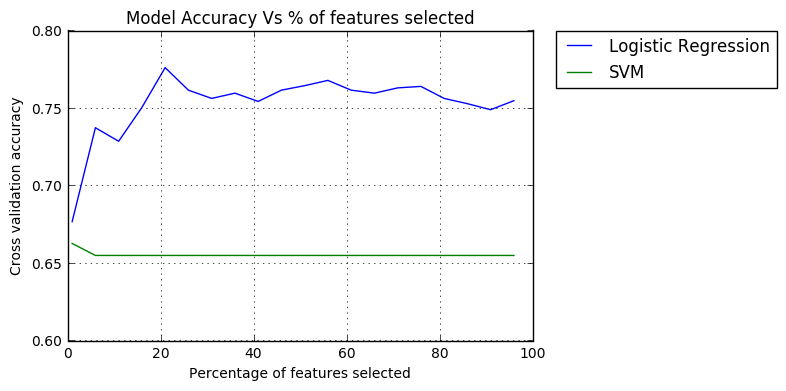

In [97]:
###### Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results, label="Logistic Regression")
pl.plot(percentiles,results2, label="SVM")
plt.axis([0, 100, 0.6, 0.8])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Model Accuracy Vs % of features selected')
plt.grid(True)

> The figure above Visualizes comparison of cross validation accuracy vs percentage of features selected for both SVM and Linear Regression model on our North Carolina education data. 

> **We note the following trends:** 

> 1. For Linear Regression model; 21% of the features gives us the best performing model that fits our data well.  When more than 21% of the features are used, accuracy for Logistic regression model starts to degrade.

> 2.  Accuracy for SVM increases with increasing number of features used. The only down side is it takes much longer to train an SVM model with the increase in the number of features. 

> 3.  Across the board, logistic regression is superior to SVM for classification accuracy regardless of the number of features used.

> We choose to proceed with 21% of the features as our optimal number of features to use for our classification task.

In [98]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=21)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)
print('')
Chi2_Score = pd.DataFrame()

for i in range(len(df_X.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': df_X.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score   

[False False False  True  True  True  True  True  True False False False  True
 False  True  True  True False  True  True  True  True  True False False False
 False False False  True  True  True  True  True False  True  True False  True
  True  True  True False  True False  True False  True  True False  True False
 False  True  True False  True False  True False  True False False False False
  True False False  True  True  True  True  True  True  True False  True False
 False  True  True False False  True  True  True False False False  True False
 False False False False False False False  True False False False  True  True
  True  True False False False False  True  True  True  True  True False False
 False False  True False False False False False  True  True False False False
 False  True False  True  True  True  True False  True False  True False False
 False False False False False False False  True  True False False False False
 False False False  True False False False False Fal

,Feature,chi-squared
0,ACT_English_Benchmark,14.017056
1,ACT_Composite_Score_UNC_Min,8.187275
2,EOG_Gr3_CACR,62.189301
3,EOG_Reading_Gr3_CACR,101.463512
4,EOG_Reading_G3_GLP,58.247057
5,EOG_Gr3_GLP,15.626975
6,All_EOG_Subjects_CACR,40.112991
7,EOG_Gr4_CACR,22.649670
8,EOG_Reading_Gr4_CACR,34.555338
9,EOG_Reading_Grades_3_8_CACR,62.088120


> * In the code above, we select 21% of the features in our training set based on Chi2 test.
> * Above table shows our selected features with their chi-squared score

In [99]:
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

In [105]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dt = LogisticRegression()
sv = SVC()

lencol = int(0.21*X_train.shape[1]) #count 21% of the columns
X_new = SelectKBest(chi2, k=lencol).fit_transform(X_train, y_train) #select the  best cols

scores = cross_validation.cross_val_score(dt, X_new, y_train, cv=2)
scores2 = cross_validation.cross_val_score(sv, X_new, y_train, cv=2)

#values for 30 fold cross validation
print('Logistic Regression 20 fold cross validation score')
print('-------------------------------')
print(scores)
#average score
print('-------------------------------')
print('Logits average score of the 20 fold cross validation')
print(scores.mean())
#values for 30 fold cross validation
print('SVM 20 fold cross validation score')
print('-------------------------------')
print(scores2)
#average score
print('-------------------------------')
print('SVM average score of the 20 fold cross validation')
print(scores2.mean())


Logistic Regression 20 fold cross validation score
-------------------------------
[ 0.78  0.76]
-------------------------------
Logits average score of the 20 fold cross validation
0.76732390845
SVM 20 fold cross validation score
-------------------------------
[ 0.66  0.65]
-------------------------------
SVM average score of the 20 fold cross validation
0.654871465199
CPU times: user 3 s, sys: 110 ms, total: 3.11 s
Wall time: 6.48 s


> A Logistics regression model trained and tested on the training dataset with 21% of features selected based on the chi-square yields 77% accurancy as shown above where as SVM yields 65.5%.

## Approach 2: Tuning Parameters <a class="anchor" id="approach2"></a>

In this section, we will compare the Logistic Regression model with SVM model. The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. We can achieve this by forcing each algorithm to be evaluated on a consistent test harness. We will be using `df_X` and `df_y` since we are passing it to cross_val_score.

In [101]:
%%time
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("SVM_Kernel_linear", SVC(kernel='linear')))
models.append(("SVM_Kernel_linear_C1.5", SVC(C=1.5, kernel='linear')))

# declare results
results = []

# declare names to hold model names
names = []

scoring='accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 0.801466
LogReg_C2: 0.799139
LogReg_C10: 0.801467
SVM: 0.659942
SVM_Kernel_linear: 0.770052
SVM_Kernel_linear_C1.5: 0.773547
CPU times: user 52min 31s, sys: 56.4 s, total: 53min 27s
Wall time: 1h 4min 51s


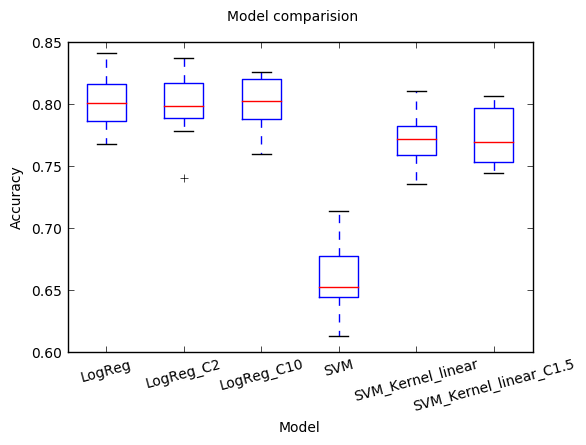

In [102]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Model comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel("Model")
plt.ylabel("Accuracy")
ax = ax.set_xticklabels(names, rotation='15')

We chose to manipulate the C parameter of logistic regression that determines the strength of the regularization. Higher values of C correspond to less regularization. For SVM, we chose to manipulate the Kernel and the C parameter. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 

Observation:
In terms of model training time, SVM_Kernel_linear models took the longest time. 
In terms of accuracy (our metric for comparing model performance), we see that Logistic Regression with C=10 was the best model.

## Approach 3: Using Stochastic Gradient descent <a class="anchor" id="approach3"></a>

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex functions such as (linear) Support Vector Machines and Logistic Regression. The class `SGDClassifier` implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification. The loss function can be set via the `loss` parameter. Using a `loss` function `loss="hinge"` corresponds to *linear Support Vector Machine* and using `loss="log"` corresponds to  *logistic regression* 

SGD_LR: 0.568476
SGD_SVM: 0.609506
SGD_LR_10: 0.614611
SGD_SVM_10: 0.604147
SGD_LR_100: 0.610651
SGD_SVM_100: 0.630097
SGD_LR_1000: 0.616535
SGD_SVM_1000: 0.580106
CPU times: user 2min 32s, sys: 5.04 s, total: 2min 37s
Wall time: 4min 40s


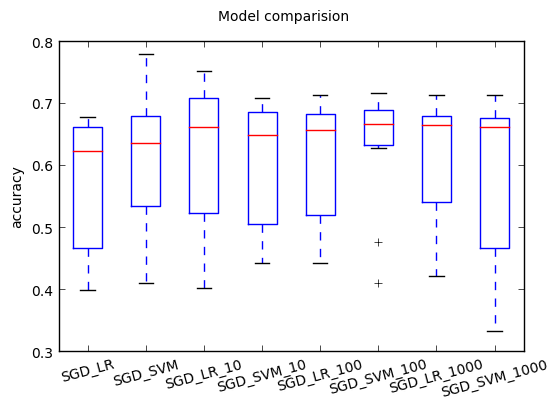

In [103]:
%%time
# Step 1: import the class
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# prepare models
models = []
models.append(('SGD_LR', SGDClassifier(loss = "log", penalty="l2")))
models.append(('SGD_SVM', SGDClassifier(loss = "hinge", penalty="l2")))
models.append(('SGD_LR_10', SGDClassifier(loss = "log", penalty="l2", n_iter=10)))
models.append(('SGD_SVM_10', SGDClassifier(loss = "hinge", penalty="l2", n_iter=10)))
models.append(('SGD_LR_100', SGDClassifier(loss = "log", penalty="l2", n_iter=100)))
models.append(('SGD_SVM_100', SGDClassifier(loss = "hinge", penalty="l2", n_iter=100)))
models.append(('SGD_LR_1000', SGDClassifier(loss = "log", penalty="l2", n_iter=1000)))
models.append(('SGD_SVM_1000', SGDClassifier(loss = "hinge", penalty="l2", n_iter=1000)))

# results
results = []
names = []

scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f" %(name, cv_results.mean()))

import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Model comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('accuracy')
ax = ax.set_xticklabels(names, rotation='15')

In terms of model training time, this ran in less than 2 minutes compared to 24 minutes without SGD.
In terms of performance, there seems to be a high degree of variablilty when using SGDClassifer. Thus not very reliable.

## Approach 4: Standardizing Stochasic Gradient Descent <a class="anchor" id="approach4"></a>

Scaled_SGD_LR: 0.855746
Scaled_SGD_SVM: 0.861955
Scaled_SGD_LR_10: 0.857295
Scaled_SGD_SVM_10: 0.859240
Scaled_SGD_LR_100: 0.849543
Scaled_SGD_SVM_100: 0.853036
Scaled_SGD_LR_1000: 0.855746
Scaled_SGD_SVM_1000: 0.848383
CPU times: user 2min 52s, sys: 6.46 s, total: 2min 58s
Wall time: 5min 42s


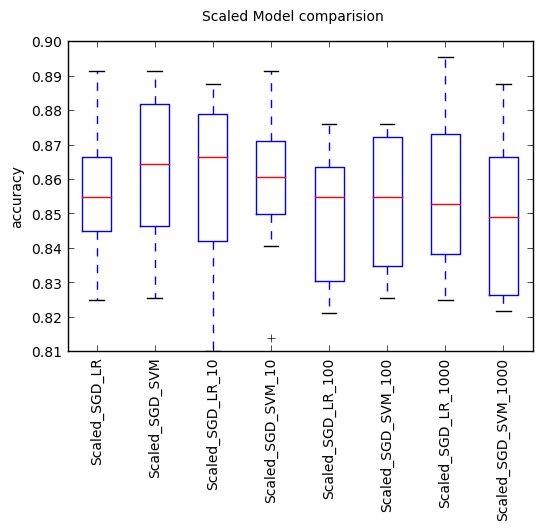

In [104]:
%%time
# Step 1: import the class
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


# prepare models
pipelines = []
pipelines.append(('Scaled_SGD_LR', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_LR", SGDClassifier(loss = "log", penalty="l2"))])))
pipelines.append(('Scaled_SGD_SVM', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_SVM", SGDClassifier(loss = "hinge", penalty="l2"))])))
pipelines.append(('Scaled_SGD_LR_10', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_LR", SGDClassifier(loss = "log", penalty="l2", n_iter=10))])))
pipelines.append(('Scaled_SGD_SVM_10', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_SVM", SGDClassifier(loss = "hinge", penalty="l2", n_iter=10))])))
pipelines.append(('Scaled_SGD_LR_100', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_LR", SGDClassifier(loss = "log", penalty="l2", n_iter=100))])))
pipelines.append(('Scaled_SGD_SVM_100', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_SVM", SGDClassifier(loss = "hinge", penalty="l2", n_iter=100))])))
pipelines.append(('Scaled_SGD_LR_1000', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_LR", SGDClassifier(loss = "log", penalty="l2", n_iter=1000))])))
pipelines.append(('Scaled_SGD_SVM_1000', Pipeline([('Scaler', StandardScaler()), 
                                             ("SGD_SVM", SGDClassifier(loss = "hinge", penalty="l2", n_iter=1000))])))




# results
results = []
names = []

scoring = 'accuracy'

for name, model in pipelines:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f" %(name, cv_results.mean()))

import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Scaled Model comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('accuracy')
ax = ax.set_xticklabels(names, rotation='90')

By scaling and bringing the features to the same scale, it was found that the overall model accuracy has increased. There was no change in terms of model training time.

## Tuning Summary <a class="anchor" id="approachSummary"></a>

We chose `Logistic Regression with C=10` as our best model which was part of `Approach 2: Tuning the parameters of the model`. The reason for choosing this is because it has less variance in terms of accuracy and thus more reliable. We can be more certain of the predictions from this model than the others we found in all four approaches. We will be using this model in Section 3 to open it up and check the most significant coefficients.

### SECTION 2 : <a class="anchor" id="question2"></a>

1. Discuss the advantages of each model for each classification task. 
2. Does one type of model offer superior performance over another in terms of prediction accuracy? 
3. In terms of training time or efficiency? Explain in detail.

### Advantages and Disadvantages of  SVM vs  Logistic Regression

 #### Advantages

> ** Logistic Regression **
> * ** ` Simple nice probabilistic interpretation: `**
> Since Predictions are mapped to be between 0 and 1 through the logistic function, predictions can be interpreted as class probabilities. This makes Logistic regression a much simpler model to interpret compared to SVM.


> ** SVM **

> * ** ` Less overfitting, robust to noise: `**
> Generally speaking, SVM is robust to outliers for cases where data is linearly separable as it considers only support vectors to set the boundary. Any interior points aren't going to affect the boundary. Once the support vectors are identified, all other instances in the training data could be deleted without changing the position of the dividing hyperplane



 #### Disadvantages

> ** Logistic Regression **

> * ** `Overfitting the Model: `**
> Logistic regression tends to be vulnerable to overconfidence in cases involving imbalanced classes. In such cases, Logistic regression model tends to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.  This is a particular important aspect to consider for our model where our predicted variable summer_program_flag is imbalanced with False: 1702 and True: 877 observations. 

>    Reference: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/
>* **`Limited Outcome Variables: `** 
> Logistic regression works well for predicting categorical outcomes like admission and rejection but not continuous like graduation rate which what we plan to predict in Lab 2. We were tempted to attempt to convert the graduation rate into discrete categories like "high graduation" or "low graduation", based on a selected threshold but by doing so we would sacrifice the precision of the data set. This is a significant disadvantage when working with data on a continuous scale. Considering that we decided to classify schools based on whether they have a summer program or not which was already a categorical variable.

> ** SVM **

> * **`Long training time on large data sets: ` **
> Not considering stochastic gradient descent, SVM is Computationally expensive, thus runs slow.  Shown below, it took 7.36 sec to train an SVM model vs 1.4 seconds needed on the small dataset. These times are bound to scale exponentially for a larger dataset.

### Training Time  and Prediction accuracy: SVM vs Logistic Regression

###  ** Training time **

> #### 1. Logistic Regression

In [106]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
dt = LogisticRegression(random_state = 4)

scores = cross_validation.cross_val_score(dt, X_train_new, y_train, cv=30)

#values for 30 fold cross validation
print('Logistic Regression 30 fold cross validation score')
print('-------------------------------')
print(scores.mean())



Logistic Regression 30 fold cross validation score
-------------------------------
0.783238947753
CPU times: user 54.7 s, sys: 1.71 s, total: 56.4 s
Wall time: 1min 35s


> #### 2. SVM

In [107]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sv = SVC(random_state = 4)

scores = cross_validation.cross_val_score(sv, X_train_new, y_train, cv=30)

#values for 30 fold cross validation
print('SVM 30 fold cross validation score')
print('-------------------------------')
print(scores.mean())

SVM 30 fold cross validation score
-------------------------------
0.65489708927
CPU times: user 52.6 s, sys: 1.64 s, total: 54.3 s
Wall time: 1min 36s


> #### 3. SGD

In [108]:
%%time
from sklearn.linear_model import SGDClassifier

sgd_logreg = SGDClassifier(random_state = 4)

scores = cross_validation.cross_val_score(sgd_logreg, X_train_new, y_train, cv=30)


#values for 30 fold cross validation
print('SGD 30 fold cross validation score')
print('-------------------------------')
print(scores.mean())

SGD 30 fold cross validation score
-------------------------------
0.638931108675
CPU times: user 2.25 s, sys: 85.8 ms, total: 2.34 s
Wall time: 4.01 s


>Fitting SVM on its own is slower than the Logistic regression model. There is no significant difference between the time it takes to train a Logistic regression model vs SVM model on the same dataset. Also note, Stochastic Gradient Descent is much faster than either of the other two on the same dataset. 

###  ** Predictive Power **

> #### 1. Logistic Regression

In [109]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logis= LogisticRegression() 
logis.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = logis.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logis.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred)
print("confusion matrix\n",conf)


Accuracy of logistic regression classifier on test set: 0.7888
confusion matrix
 [[302  49]
 [ 60 105]]
CPU times: user 1.93 s, sys: 67.5 ms, total: 2 s
Wall time: 3.42 s


> #### 2. SVM

In [110]:
%%time
from sklearn import metrics
from sklearn.svm import SVC
SV = SVC()
SV.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = SV.predict(X_test_new)
print('Accuracy of SVM classifier on test set: {:.4f}'.format(SV.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred)
print("confusion matrix\n",conf)


Accuracy of SVM classifier on test set: 0.6802
confusion matrix
 [[351   0]
 [165   0]]
CPU times: user 2.7 s, sys: 89.3 ms, total: 2.79 s
Wall time: 5.18 s


> #### 3. SGD

In [111]:
%%time
from sklearn import metrics
from sklearn.linear_model import SGDClassifier

sgd_logreg = SGDClassifier(random_state = 4)

sgd_logreg.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = SV.predict(X_test_new)
print('Accuracy of SGD classifier on test set: {:.4f}'.format(sgd_logreg.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred)
print("confusion matrix\n",conf)


Accuracy of SGD classifier on test set: 0.6802
confusion matrix
 [[351   0]
 [165   0]]
CPU times: user 477 ms, sys: 19.7 ms, total: 497 ms
Wall time: 844 ms


>From an accuracy standpoint, Logistic Regression with 78.88%  is the winner followed by SVM and SGD which showed similar prediction accuracy of ~68.02%

## Summary

> Referencing the advantages and disadvantages; training time and model accuracy discussed above, below we summaries which model has an upper hand considering our dataset. Our analysis is based on using our final dataset with limited more critical features selected by Chi-Squared. Our training set has 191 features and 516 observations.

>* **** Model Training Time: **** 
> As illustrated above, SVM training with stochastic gradient descent for 30 cross validation is much faster for our selected data set (~497ms) vs. logistic regression training (~2s). This time is bound to increase with an increase in the size of our dataset. In this regard **`SVM with Stochastic gradient descent`** is the winner.

>* **** Model Prediction Accuracy: **** 
> For a 30-fold cross validation, **`Logistic Regression`** is the clear winner with an accuracy of ~78.88% vs base SVM accuracy of 68.02% or LR with stochastic gradient descent of 68.02%.






## Comparison of Calibration

> Well calibrated classifiers are probabilistic classifiers for which the output of the predict_proba method can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approx. 80% actually belong to the positive class. LogisticRegression returns well calibrated predictions as it directly optimizes log-loss.

> Reference: http://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py

In [114]:
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

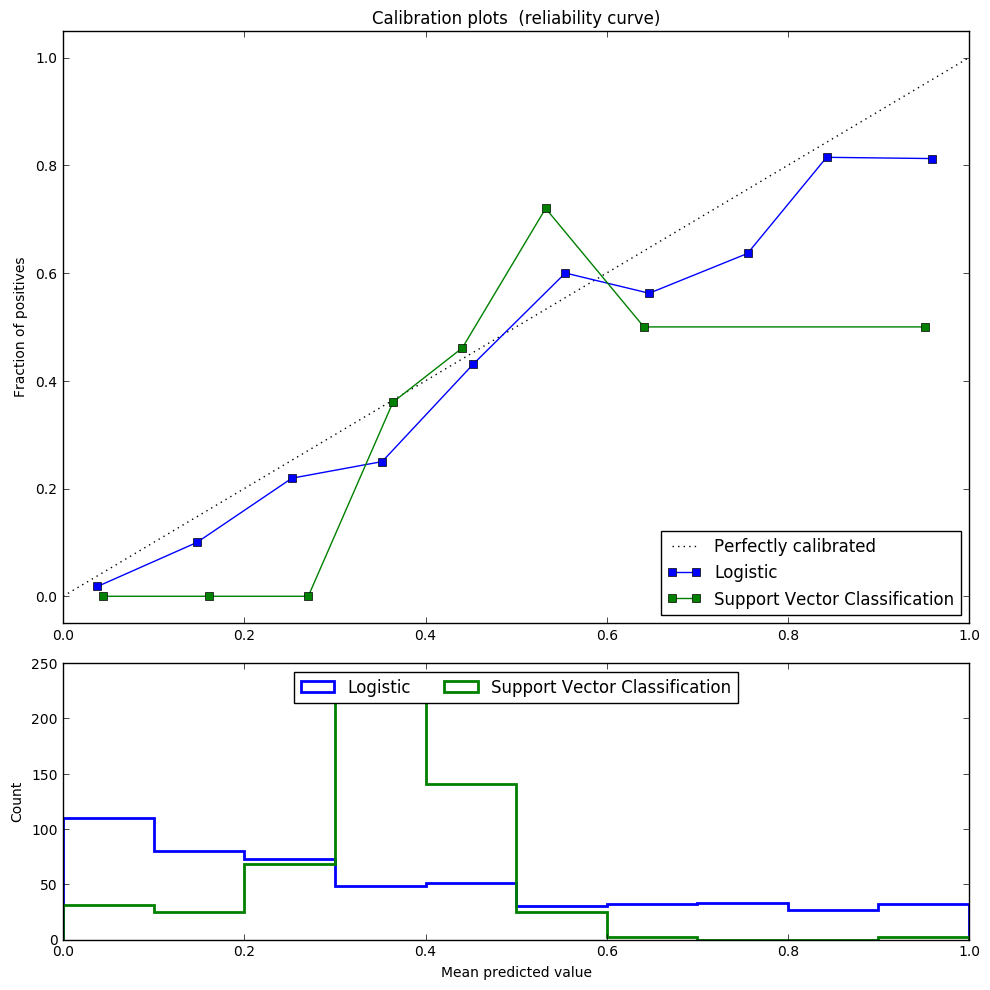

CPU times: user 4.2 s, sys: 221 ms, total: 4.42 s
Wall time: 8.87 s


In [115]:
%%time

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

lr = LogisticRegression()
svc = LinearSVC(C=1.0)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (svc, 'Support Vector Classification')]:
    clf.fit(X_train_new, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_new)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_new)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

> Logistic Regression returns better calibrated predictions as it directly optimizes log-loss, in contrast to the SVM.

### SECTION 3: <a class="anchor" id="question3"></a>

1. Use the weights from logistic regression to interpret the importance of different features for the classification task. 
2. Explain your interpretation in detail. Why do you think some variables are more important?

For this section, we used the `LogisticRegression` model with `C=10`. The weights can be obtained from `coef_` attribute of the model object. We then combine these weights with the corresponding features and sort the features based on the absolute value of the weights. We then list the 20 features which are contributing the most towards this model.

In [116]:
from sklearn.linear_model import LogisticRegression

# best model
LR = LogisticRegression(C=10)

# fit the model
LR.fit(X_train_new, y_train)

# coefs
coefs = list(abs(LR.coef_[0]))

# features
features = list(X_train_new.columns)

# zip them up
zipped = list(zip(features, coefs))

# create dictionary
coef_features = dict(zipped)

import operator
sorted_coef_features = sorted(coef_features.items(), key=operator.itemgetter(1), reverse=True)

# print the top 20 features with the heighest weights. 
i = 0
for feature, weight in sorted_coef_features:
    if (i <= 20):
        print(feature, weight)
        i=i+1

SBE District_Southeast Region 0.758471896269
SBE District_Western Region 0.579261608041
scity_ad_Durham 0.434011105538
scity_ad_Fayetteville 0.417701084872
SBE District_SandHills Region 0.336720967276
SBE District_Northeast Region 0.284452176594
no_data_spg_flg 0.276547055561
Avg_Dist_Size_02 0.245654328073
All_EOG_EOC_Subjects_GLP 0.240867477384
SPG Grade_I 0.237190533162
Math SPG Grade_F 0.219951568893
scity_ad_Greensboro 0.204896326121
All_EOG_EOC_Subjects_CACR 0.20352753096
title1_type_flg 0.201581133335
digital_media_pct 0.192784393228
scity_ad_Lexington 0.191365094849
EOG_Reading_G3_GLP 0.186261457767
EOG_Reading_Grades_3_8_GLP 0.177763465556
lea_sat_participation_pct 0.17371349013
scity_ad_Morganton 0.173561644803
scity_ad_Salisbury 0.169656212032


> There are a number of variables which we will group together for the first part of our analysis which we believe to be financially driven; the Regions, cities, `title1_type_flg`, and `digital_media_pct`. The Region and city fields listed could have more money to pay for summer programs, or perhaps the cities believe summer school programs to be an initiative worth pursuing and therefore the schools within this city tend to have such programs. The `title1_type_flg` variable represents schools that have Title 1 Status. The Title 1 program provides financial assistance to schools with a high percentage of poor students. Allocating some of this money towards summer school programs seems a reasonable assumption. The percent of digital media devices would be higher in schools which had more money. It would seem reasonable that a school that can afford to have a high number of these devices would also be able to have summer programs. 

> The average size of a second grade class at the district level being in this list gives us pause. Since we see other elementary variables with high weights there may perhaps be an interaction between class size and school category that influence whether a school has a summer program. The idea behind this being that schools which have elementary grades would, or would not, have a summer school program depending on the number of students at the school. In interpreting the end of course/grade scores, a similar line of thought proposes the hypotheses that programs achieve high test scores because they have a summer program, or that they needed to add summer schools because they were scoring low. 

> Our interpretation of the presence of the SPG fields is similar to that of the EOC/EOG grades. A school with an SPG Grade of I or F represents a school which does not have a high school performance grade. Schools that fall into this category, either in an overall grade or by subject, are lagging compared to their peers. This could indicate that either summer school programs are needed, or that summer school programs have been put in place in an attempt to bolster the SPG scores at the school.

> Schools that offer SAT test prep courses through summer school programs could explain why the `lea_sat_participation_pct` was returned. A school which offers this type of program, or any summer school program, has a strong interest in their students and therefore would push for students to participate in taking the SAT, thus driving up this number. 

### SECTION 4: <a class="anchor" id="question4"></a>

Look at the chosen support vectors for the classification task. 
1. Do these provide any insight into the data? Explain. 
2. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

In [117]:
%%time 
from sklearn import metrics
from sklearn.svm import SVC 
SV = SVC(kernel='linear') 
SV.fit(X_train_new, y_train) ## Predicting the test set results AND calculating the accuracy 
y_pred = SV.predict(X_test_new) 
print('Accuracy of SVM classifier on test set: {:.4f}'.format(SV.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred) 
print("confusion matrix\n",conf)

Accuracy of SVM classifier on test set: 0.7713
confusion matrix
 [[299  52]
 [ 66  99]]
CPU times: user 1min 1s, sys: 1.87 s, total: 1min 3s
Wall time: 1min 53s


In [118]:
# get support vectors 
print(SV.support_vectors_.shape) #[n_SV, n_features] 
# get indices of support vectors 
print(SV.support_.shape) #[n_SV] 
# get number of support vectors for each class 
print(SV.n_support_ )

(789, 191)
(789,)
[393 396]


> We have 393 support vectors for summer_prg_flg True and 396 support vectors for summer_prg_flg False.

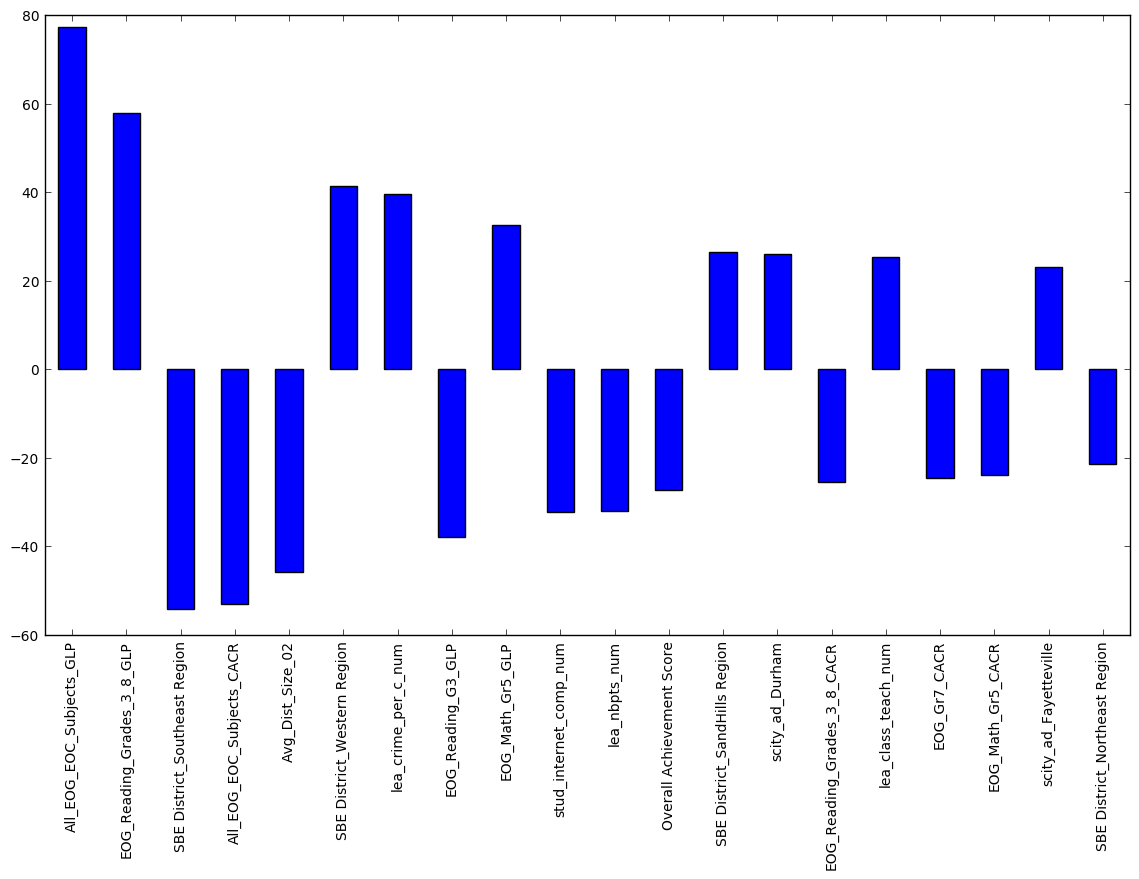

In [119]:
# if using linear kernel, these make sense to look at (not otherwise, why?) 
import pandas as pd 
import numpy as np 
#print(SV.coef_) 
weights = pd.Series(SV.coef_[0],index=X_train_new.columns) 
top20 = abs(weights).sort_values(ascending = False).head(20) 
topDF = weights[top20.index] 
ax = topDF.head(n=20).plot(kind='bar',figsize = (14, 8), color = 'b')

In [120]:
print(topDF)

All_EOG_EOC_Subjects_GLP         77.335159
EOG_Reading_Grades_3_8_GLP       57.934346
SBE District_Southeast Region   -54.182215
All_EOG_EOC_Subjects_CACR       -52.933652
Avg_Dist_Size_02                -45.867127
SBE District_Western Region      41.349308
lea_crime_per_c_num              39.624588
EOG_Reading_G3_GLP              -37.839153
EOG_Math_Gr5_GLP                 32.488471
stud_internet_comp_num          -32.154297
lea_nbpts_num                   -31.973279
Overall Achievement Score       -27.348093
SBE District_SandHills Region    26.525821
scity_ad_Durham                  26.037372
EOG_Reading_Grades_3_8_CACR     -25.457509
lea_class_teach_num              25.450574
EOG_Gr7_CACR                    -24.575139
EOG_Math_Gr5_CACR               -23.925866
scity_ad_Fayetteville            23.000000
SBE District_Northeast Region   -21.470320
dtype: float64


>Above we show the top twenty most weighted features for our support vectors. 

> We see quite a bit of overlap between features that are strongly weighted in terms of their support vectors in our SVM model to the highly weighted features in our Logistic regression coef weights in section 3 above. 

>Features related to Education attainment i.e. `ALL_EOG_EOC_Subjects_GLP`, ` EOG_Reading_Grades_3_8_GLP `, ` All_EOG_EOC_Subjects_CACR `, ` EOG_Math_Gr5_CACR ` and ` Overall Achievement Score`, show up weighted as the most important support vectors in our SVM. These features strongly support the theory, existence of a summer program in a school is based on how well or poor students perform in their end of course (EOC) or end of grade (EOG).

>Location features such as `SBE District_Southeast Region`, ` SBE District_Western Region `, `SBE District_SandHills Region`, `scity_ad_Fayetteville`, `SBE District_Northeast Region` and `scity_ad_Durham`, also dominate the list of highly weighted support vectors indicating location plays a key role as to whether a school has a summer school program on not. Either these locations put more emphasis on summer programs to improve performance or these regions have more funding to easily support this summer programs.